# Overview

The so-called paradoxes of an author, to which a reader takes exception, often exist not in the author's book at all, but rather in the reader's head. - Friedrich Nietzsche Books are open doors to the unimagined worlds which is unique to every person. It is more than just a hobby for many. There are many among us who prefer to spend more time with books than anything else. Here we explore a big database of books. Books of different genres, from thousands of authors. In this challenge, participants are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features. Size of training set: 6237 records Size of test set: 1560 records 


#### FEATURES:

- Title: The title of the book
- Author: The author(s) of the book.
- Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018)
- Reviews: The customer reviews about the book
- Ratings: The customer ratings of the book
- Synopsis: The synopsis of the book
- Genre: The genre the book belongs to
- BookCategory: The department the book is usually available at.
- Price: The price of the book (Target variable)

In [758]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [759]:
os.listdir()

['.ipynb_checkpoints',
 'Book.ipynb',
 'Data.zip',
 'Data_Test.xlsx',
 'Data_Train.xlsx',
 'Sample_Submission.xlsx']

In [760]:
train_data = pd.read_excel('./Data_Train.xlsx')
test_data = pd.read_excel('./Data_Test.xlsx')

## 1. Data Understanding

In [761]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [762]:
train_data.shape

(6237, 9)

In [763]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [764]:
train_data.dtypes

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

In [765]:
test_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [766]:
test_data.shape

(1560, 8)

In [767]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 97.6+ KB


In [768]:
test_data.dtypes

Title           object
Author          object
Edition         object
Reviews         object
Ratings         object
Synopsis        object
Genre           object
BookCategory    object
dtype: object

### Findings:

Train Dataset:
- We have 9 columns and 6237 data points.
- `Price` is target variable.

Test Dataset:
- We have 8 columns except target variable(`price`) and 1560 data points.

In [769]:
train_data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

**Unique entries in each column**

In [770]:
train_data.nunique()

Title           5568
Author          3679
Edition         3370
Reviews           36
Ratings          342
Synopsis        5549
Genre            345
BookCategory      11
Price           1614
dtype: int64

## 2. Data Cleaning

### 2.1 Check for missing values

In [771]:
train_data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [772]:
test_data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

- No missing values in our datasets

### 2.2 Reviews
Extract review from `Reviews` column

In [773]:
train_data['Reviews'] = train_data['Reviews'].apply(lambda x: float(x.split()[0]))
test_data['Reviews'] = test_data['Reviews'].apply(lambda x: float(x.split()[0]))

### 2.3 Ratings
Extract number of rating from `Ratings` column

In [774]:
train_data['Ratings'] = train_data['Ratings'].apply(lambda x: x.split()[0].replace(',', '')).astype(int)
test_data['Ratings'] = test_data['Ratings'].apply(lambda x: x.split()[0].replace(',', '')).astype(int)

### 2.4 Edition
Extracting edition year from `Edition` column

Extracting cover type from `Edition` column

In [775]:
# Extracting edition year from `Edition` column
train_data['Edition_Year'] = train_data['Edition'].apply(lambda x: x.split(' ')[-1] if x.split()[-1].isdigit() else '2018')
test_data['Edition_Year'] = test_data['Edition'].apply(lambda x: x.split(' ')[-1] if x.split()[-1].isdigit() else '2018')

In [776]:
# Extracting cover type from `Edition` column
train_data['Edition_Type'] = train_data['Edition'].apply(lambda x: x.split(',')[0])
test_data['Edition_Type'] = test_data['Edition'].apply(lambda x: x.split(',')[0])

In [777]:
train_data['Edition_Type'].value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Plastic Comb                1
(Spanish)                   1
(German)                    1
Product Bundle              1
Board book                  1
Leather Bound               1
Library Binding             1
(Kannada)                   1
Perfect Paperback           1
(French)                    1
Name: Edition_Type, dtype: int64

We can see that there are large number of categories of `Edition_Type` with small frequency.

Let's merge those small frequency.

In [778]:
# Merging categories with small frequencies
def get_high_freq(df, col, new_col, thresh):
    series = pd.value_counts(df[col])
    mask = (series / series.sum() * 100).lt(thresh)
    df[new_col] = np.where(df[col].isin(series[mask].index), 'Other', df[col])
    return df

In [779]:
thresh = 1
train_data = get_high_freq(train_data, 'Edition_Type', 'Edition_Type', thresh)

In [780]:
train_data['Edition_Type'].value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Other                      66
Name: Edition_Type, dtype: int64

In [781]:
test_data = get_high_freq(test_data, 'Edition_Type', 'Edition_Type', thresh)

In [782]:
test_data['Edition_Type'].value_counts()

Paperback                1265
Hardcover                 233
Mass Market Paperback      45
Other                      17
Name: Edition_Type, dtype: int64

- We can see that we have only 4 Edition Types

### 2.5 Genre
Extracting Books from `Genre` column

In [783]:
train_data['Genre'] = train_data['Genre'].apply(lambda x: x.strip('(Books)'))
test_data['Genre'] = test_data['Genre'].apply(lambda x: x.strip('(Books)'))

### 2.6 Standardise
Covert textual data to lower csae

In [784]:
def lower_data(df, cols):
    for col in cols:
        df[col] = df[col].str.lower()

In [785]:
cols = ['Author', 'Synopsis', 'Genre', 'BookCategory', 'Edition_Type']

# train dataset
lower_data(train_data, cols)
# test dataset
lower_data(test_data, cols)

In [786]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_Year,Edition_Type
0,The Prisoner's Gold (The Hunters 3),chris kuzneski,"Paperback,– 10 Mar 2016",4.0,8,the hunters return in their third brilliant no...,action & adventure,action & adventure,220.00,2016,paperback
1,Guru Dutt: A Tragedy in Three Acts,arun khopkar,"Paperback,– 7 Nov 2012",3.9,14,a layered portrait of a troubled genius for wh...,cinema & broadcast,"biographies, diaries & true accounts",202.93,2012,paperback
2,Leviathan (Penguin Classics),thomas hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""during the time men live without a common pow...",international relation,humour,299.00,1982,paperback
3,A Pocket Full of Rye (Miss Marple),agatha christie,"Paperback,– 5 Oct 2017",4.1,13,a handful of grain is found in the pocket of a...,contemporary fiction,"crime, thriller & mystery",180.00,2017,paperback
4,LIFE 70 Years of Extraordinary Photography,editors of life,"Hardcover,– 10 Oct 2006",5.0,1,"for seven decades, ""life"" has been thrilling t...",photography textb,"arts, film & photography",965.62,2006,hardcover


In [787]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 2.7 Calculate Polarity and Subjectivity for `Synopsis`

In [788]:
stop = stopwords.words('english')
st = PorterStemmer()

In [789]:
def get_polar_subj(df):

    df['Synopsis'] = df['Synopsis'].apply(lambda x: ' '.join(x for x in x.split() if x.isalnum()))
    # remove stop words from sentences
    df['Synopsis'] = df['Synopsis'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    # apply stemmer
    df['Synopsis'] = df['Synopsis'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    # get polarity of sentence
    df['Polarity'] = df['Synopsis'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    # get Subjectivity of sentence
    df['Subjectivity'] = df['Synopsis'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

    return df

In [790]:
# polarity and sensitivity for train dataset
train_data = get_polar_subj(train_data)

# polarity and sensitivity for test dataset
test_data = get_polar_subj(test_data)

In [791]:
# drop columns for test dataset
train_data.drop(['Edition', 'Title', 'Synopsis'], axis = 1, inplace = True)

# drop columns for test dataset
test_data.drop(['Edition', 'Title', 'Synopsis'], axis = 1, inplace = True)

In [792]:
train_data.head()

,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year,Edition_Type,Polarity,Subjectivity
0,chris kuzneski,4.0,8,action & adventure,action & adventure,220.00,2016,paperback,0.281818,0.494949
1,arun khopkar,3.9,14,cinema & broadcast,"biographies, diaries & true accounts",202.93,2012,paperback,0.096853,0.391375
2,thomas hobbes,4.8,6,international relation,humour,299.00,1982,paperback,0.082150,0.346117
3,agatha christie,4.1,13,contemporary fiction,"crime, thriller & mystery",180.00,2017,paperback,0.000000,0.250000
4,editors of life,5.0,1,photography textb,"arts, film & photography",965.62,2006,hardcover,0.560000,0.610000


In [793]:
test_data.head()

,Author,Reviews,Ratings,Genre,BookCategory,Edition_Year,Edition_Type,Polarity,Subjectivity
0,sir arthur conan doyle,4.4,960,short stories,"crime, thriller & mystery",1986,mass market paperback,0.057051,0.342949
1,gabriel n. schenker,5.0,1,operating systems textb,"computing, internet & digital media",2018,paperback,-0.031818,0.412563
2,danielle steel,5.0,4,romance,romance,2011,paperback,0.210534,0.566595
3,allen b. downey,4.1,11,programming & software development,"computing, internet & digital media",2016,paperback,0.176667,0.408056
4,redman gairns,4.4,9,linguistics,"language, linguistics & writing",2011,paperback,0.000000,0.000000


## 3. EDA

In [794]:
def plot_barplot(df, x, y, title, order=None):
    plt.figure(figsize=(10,6))
    sns.barplot(data=df, x=x, y=y, ci=None, order=order)
    plt.xticks(rotation=90)
    plt.title(title)

### Edition_Year

In [795]:
year_df = pd.DataFrame(train_data.Edition_Year.value_counts()).reset_index()
year_df.columns = ['Edition_Year', 'Count']
year_df = year_df.sort_values(by=['Count'], ascending=False).head(20)

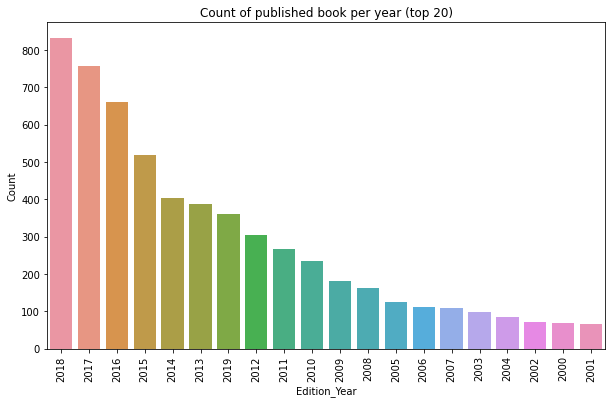

In [796]:
order = year_df['Edition_Year']
title = "Count of published book per year (top 20)"
plot_barplot(year_df, "Edition_Year", "Count", title, order)

#### Inference
- Year `2018` has highest number of published book followed by year `2017 and 2016`

### Genre

In [797]:
genre_df = pd.DataFrame(train_data['Genre'].value_counts()).reset_index()
genre_df.columns = ['Genre', 'Count']
genre_df = genre_df.sort_values(by=['Count'], ascending=False).head(20)

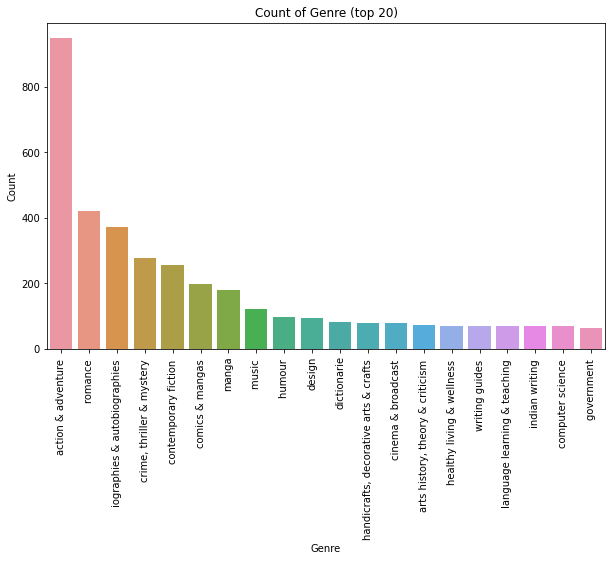

In [798]:
order = genre_df['Genre']
title = "Count of Genre (top 20)"
plot_barplot(genre_df, "Genre", "Count", title, order)

#### Inference
- `action & adventure` Genre has highest count.

### BookCategory

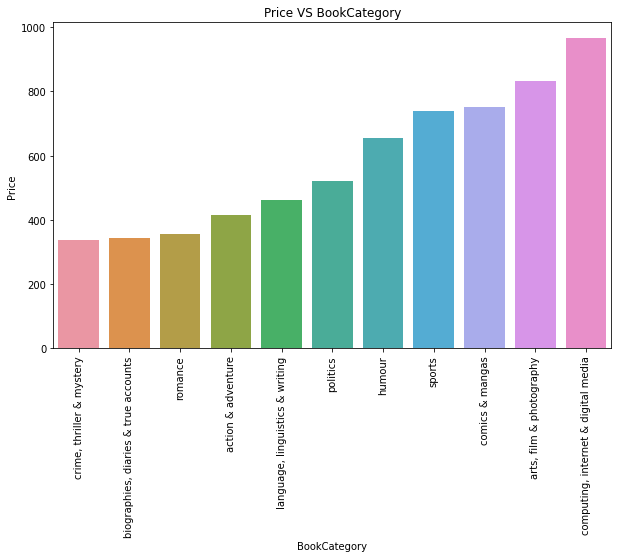

In [799]:
order = train_data.groupby('BookCategory')['Price'].mean().sort_values().index
title = "Price VS BookCategory"
plot_barplot(train_data, "BookCategory", "Price", title, order)

#### Inference
- `Computing,internet & digital media` Category has high price value.
- `Arts, film & photography` Category has second highest price value.

### Edition_Type

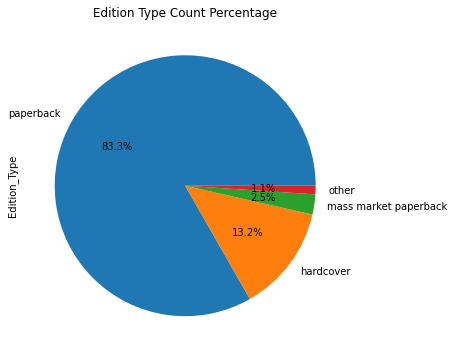

In [800]:
plt.figure(figsize=(7, 6))
train_data['Edition_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Edition Type Count Percentage')
plt.show()

#### Inference
- `Paperback` edition type has highest count.
- `Others and Mass market paperback` edition type has lowest count.

### Author

In [801]:
author_df = pd.DataFrame(train_data['Author'].value_counts()).reset_index()
author_df.columns = ['Author', 'Count']
author_df = author_df.sort_values(by=['Count'], ascending=False).head(20)

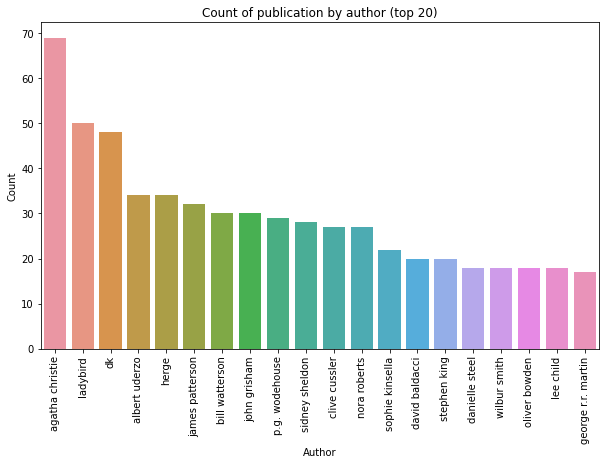

In [802]:
order = author_df['Author']
title = "Count of publication by author (top 20)"
plot_barplot(author_df, "Author", "Count", title, order)

#### Inference
- Author `agatha christie` has highest number of publication followed by `ladybird` and `dk`

#### Pair plot

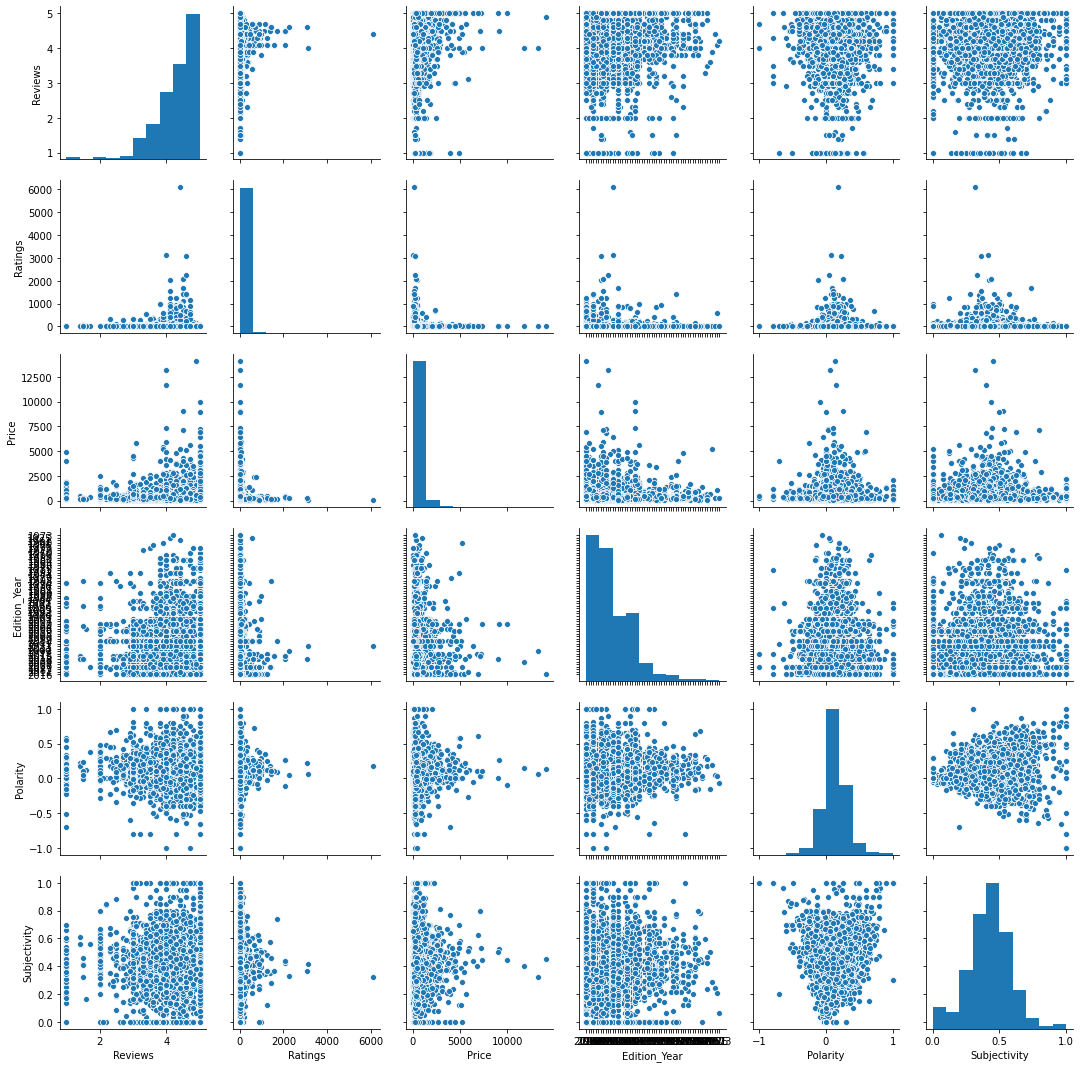

In [803]:
sns.pairplot(train_data)
plt.show()

#### Distribution of target variable Price

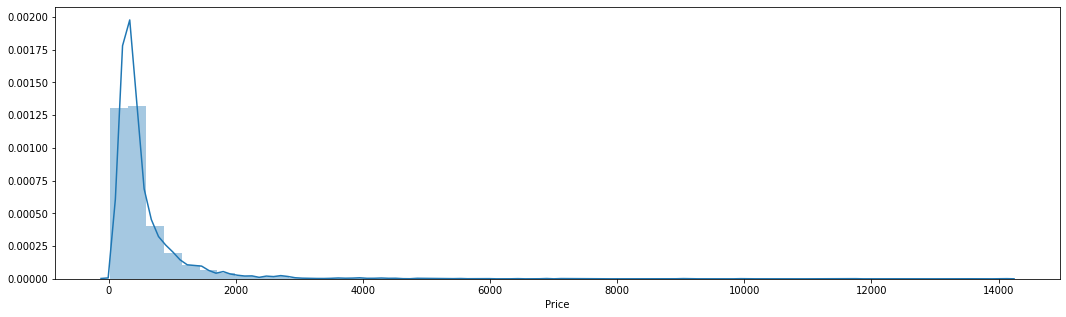

In [804]:
plt.figure(figsize=(18,5))
sns.distplot(train_data['Price'])
plt.show()

## 4. Data Preparation

### 4.1 Encoding

In [805]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

**Concat the train and test dataset.**
So that we can apply label encoding and one hot encoding

In [806]:
df = pd.concat(objs=[train_data, test_data],axis=0)

#### Label encoding
Apply label encoding on `Author, Genre and Edition_Type` columns.

In [807]:
col_encode = ["Author", "Genre", "Edition_Type", "BookCategory"]
df[col_encode] = df[col_encode].apply(le.fit_transform)

#### One hot encoding
Apply one hot encoding on `BookCategory` column.

In [808]:
# df = pd.get_dummies(df, columns= ['BookCategory'])

In [809]:
df.head()

,Author,Reviews,Ratings,Genre,BookCategory,Price,Edition_Year,Edition_Type,Polarity,Subjectivity
0,746,4.0,8,0,0,220.00,2016,3,0.281818,0.494949
1,368,3.9,14,61,2,202.93,2012,3,0.096853,0.391375
2,4035,4.8,6,186,6,299.00,1982,3,0.082150,0.346117
3,75,4.1,13,79,5,180.00,2017,3,0.000000,0.250000
4,1132,5.0,1,257,1,965.62,2006,0,0.560000,0.610000


In [810]:
train_size = len(train_data)
train_size

6237

In [811]:
# separate train dataset
train_data = df[:train_size]

# separate test dataset
test_data = df[train_size:]

In [812]:
# drop Price column from test dataset.
test_data.drop('Price', axis = 1, inplace=True)

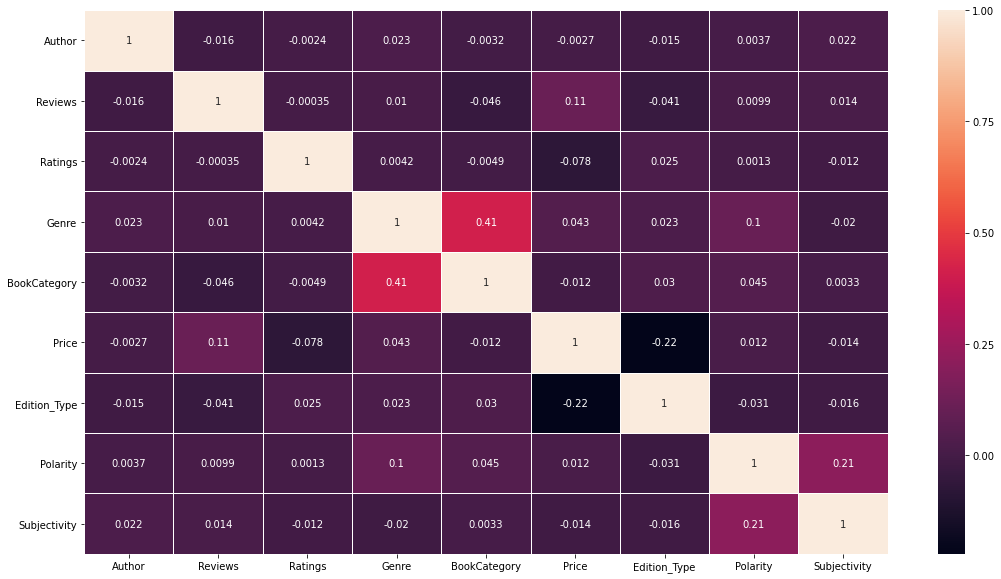

In [813]:
plt.figure(figsize=(18, 10))
sns.heatmap(train_data.corr(), annot=True, linewidths=0.5)
plt.show()

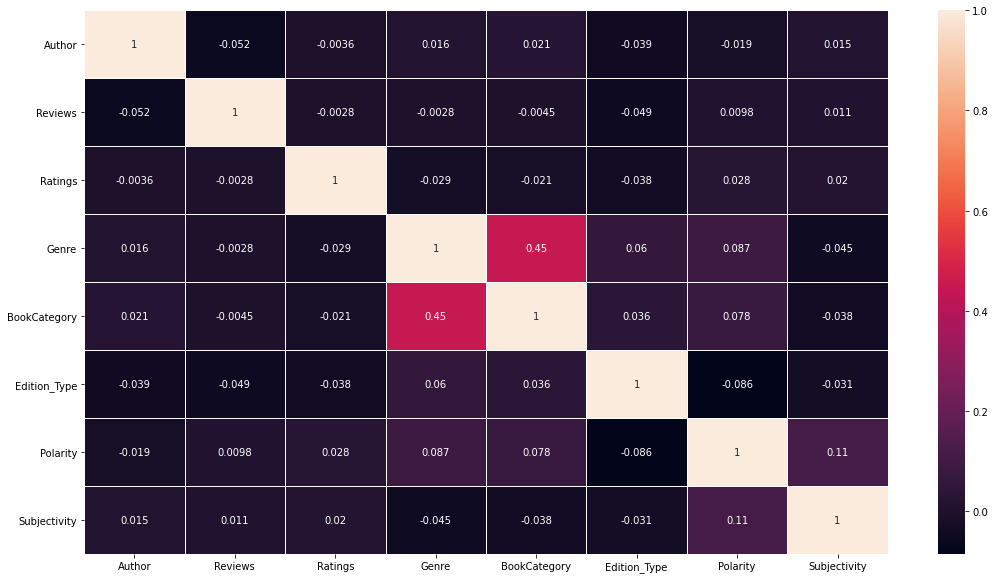

In [814]:
plt.figure(figsize=(18, 10))
sns.heatmap(test_data.corr(), annot=True, linewidths=0.5)
plt.show()

### 4.2 Spliting the train data into 'X' and 'Y'

In [815]:
train_data_copy = train_data.copy()
y = train_data_copy.pop("Price")
X = train_data_copy

In [816]:
print("Train data size :", X.shape)
print("Test  data size :", test_data.shape)

Train data size : (6237, 9)
Test  data size : (1560, 9)


### 4.3 Data Scaling

In [817]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [818]:
train_col = list(X.columns)
test_col = list(test_data.columns)

In [819]:
# # initialize the scaler
# scaler = StandardScaler()

# # transform train data
# X_train_sc[train_col] = scaler.fit_transform(X_train[train_col])

# # transform test data
# X_test_sc[test_col] = scaler.fit_transform(test_data[test_col])

In [820]:
# initialize the scaler
scaler = StandardScaler()

# transform train data
X_train_sc = scaler.fit_transform(X)

# transform test data
X_test_sc = scaler.fit_transform(test_data)

`X_train_sc and X_test_sc` can be used for linear regression

In [821]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

# for linear regression
X_train_sc, X_val_sc, y_train_sc, y_val_sc = train_test_split(X_train_sc, y, test_size=0.20)

## 5. Models

In [822]:
def model_eval(model, X_train, X_test, y_train, y_test):
    # Lets calculate some metrics such as R2 score, RSS and RMSE
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("R2 score for train:", r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R2 score for validation:", r2_test_lr)
    metric.append(r2_test_lr)
    print("--"*20)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print("RSS for train:", rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print("RSS for validation:", rss2_lr)
    metric.append(rss2_lr)
    print("--"*20)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("MSE for train:", mse_train_lr)
    metric.append(mse_train_lr)
    
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("MSE for validation:", mse_test_lr)
    metric.append(mse_test_lr)
    print("--"*20)

    rmse_train_lr = mse_train_lr**0.5
    print("RMSE for train:", rmse_train_lr)
    metric.append(rmse_train_lr)
    
    rmse_test_lr = mse_test_lr**0.5
    print("RMSE for test:", rmse_test_lr)
    metric.append(rmse_test_lr)
    print("--"*20)
    
    return metric, y_pred_train, y_pred_test

In [823]:
# Create linear regression object
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [824]:
metric, y_pred_train, y_pred_val = model_eval(reg, X_train_sc, X_val_sc, y_train_sc, y_val_sc)

R2 score for train: -128.55757165629876
R2 score for validation: -179.0914559173884
----------------------------------------
RSS for train: 325726664241.5924
RSS for validation: 81979324836.88068
----------------------------------------
MSE for train: 65288968.579192705
MSE for validation: 65688561.56801336
----------------------------------------
RMSE for train: 8080.158945168882
RMSE for test: 8104.848028680943
----------------------------------------


In [825]:
regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [826]:
y_pred = regressor.predict(X_val)
mse(y_val, y_pred)

366779.7589744063